<a href="https://colab.research.google.com/github/223t1a3105/Codsoft-/blob/main/Data_Science_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC SURVIVAL PREDICTION  Task -1 ::**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for 'age' with the median value
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing values for 'embarked' with the most frequent value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop the 'deck' and 'embark_town' columns due to a high number of missing values
df.drop(['deck', 'embark_town'], axis=1, inplace=True)

# Drop rows where 'embarked' is still missing
df.dropna(subset=['embarked'], inplace=True)

# Drop the 'who', 'alive', 'class' and 'adult_male' columns as they are redundant
df.drop(['who', 'alive', 'class', 'adult_male'], axis=1, inplace=True)


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
# Convert 'sex' and 'embarked' into numeric using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])


In [12]:
# List of columns to drop
columns_to_drop = ['pclass', 'embark_town', 'parch', 'sibsp', 'fare']

# Drop columns only if they exist in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)


In [13]:
# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Dropping irrelevant columns
columns_to_drop = ['pclass', 'embark_town', 'parch', 'sibsp', 'fare']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

# Convert 'age' into categorical bins
df['age'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 120], labels=[0, 1, 2, 3, 4])

# Convert 'age' to integer
df['age'] = df['age'].astype(int)


In [7]:
# Define the features (X) and the target variable (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8268156424581006


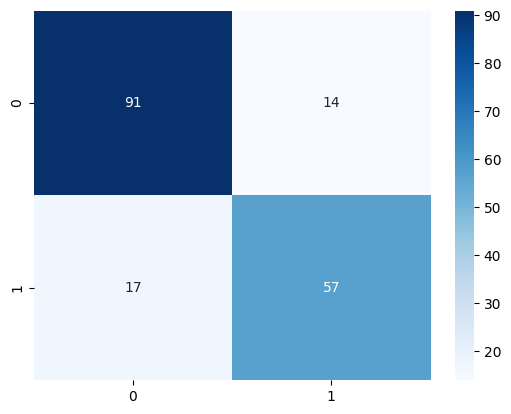

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


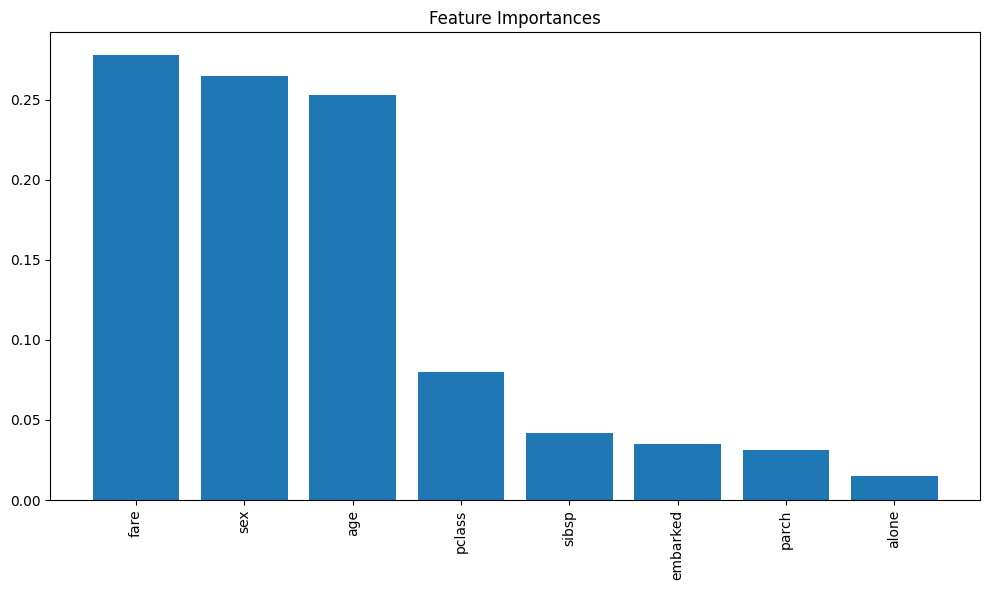

In [10]:
# Feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [11]:
import joblib

# Save the model
joblib.dump(model, 'titanic_survival_model.pkl')

# Load the model (if needed)
model = joblib.load('titanic_survival_model.pkl')
